# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW5


---
__Name:__  Nicholas Chen, Ramsey Aweti, David Skarbrevik  
__Class:__ MIDS w261 (Section Summer 2017, Group 1)     
__Email:__  nwchen24@iSchool.Berkeley.edu  
__Week:__   5

__Due Time:__ 2 Phases. 

* __HW5 Phase 1__ 
This can be done on a local machine (with a unit test on the cloud such as AltaScale's PaaS or on AWS) and is due Tuesday, Week 6 by 8AM (West coast time). It will primarily focus on building a unit/systems and for pairwise similarity calculations pipeline (for stripe documents)

* __HW5 Phase 2__ 
This will require the AltaScale cluster and will be due Tuesday, Week 7 by 8AM (West coast time). 
The focus of  HW5 Phase 2  will be to scale up the unit/systems tests to the Google 5 gram corpus. This will be a group exercise 


# Table of Contents <a name="TOC"></a> 

1.  [HW Instructions](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
       
    5.4.  [HW5.4](#5.4)    
    5.5.  [HW5.5](#5.5)    
    5.6.  [HW5.6](#5.6)    
    5.7.  [HW5.7](#5.7)    
    5.8.  [HW5.8](#5.8)    
    5.9.  [HW5.9](#5.9)    
   

<a name="1"></a>
# 1 Instructions
[Back to Table of Contents](#TOC)

MIDS UC Berkeley, Machine Learning at Scale   
DATSCIW261 ASSIGNMENT #5

Version 2017-9-2 


### IMPORTANT

This homework must be completed in the cloud 

### === INSTRUCTIONS for SUBMISSIONS ===   
Follow the instructions for submissions carefully.

Each student has a `HW-<user>` repository for all assignments.   

Click this link to enable you to create a github repo within the MIDS261 Classroom:   
https://classroom.github.com/assignment-invitations/3b1d6c8e58351209f9dd865537111ff8   
and follow the instructions to create a HW repo.

Push the following to your HW github repo into the master branch:
* Your local HW5 directory. Your repo file structure should look like this:

```
HW-<user>
    --HW3
       |__MIDS-W261-HW-03-<Student_id>.ipynb
       |__MIDS-W261-HW-03-<Student_id>.pdf
       |__some other hw3 file
    --HW4
       |__MIDS-W261-HW-04-<Student_id>.ipynb
       |__MIDS-W261-HW-04-<Student_id>.pdf
       |__some other hw4 file
    etc..
```    

<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* See async and live lectures for this week

<a name="3">
# 3 HW Problems
[Back to Table of Contents](#TOC)

<a name="5.4"></a> 
# PHASE 2
----------

# HW 5.4   
## Full-scale experiment on Google N-gram data on the CLOUD
__ Once you are happy with your test results __ proceed to generating  your results on the Google n-grams dataset. 

## 3.  HW5.4.0  <a name="5.4.0"></a> Run systems tests on the CLOUD  (PHASE 2)
[Back to Table of Contents](#TOC)

Repeat HW5.3.0 (using the same small data sources that were used in HW5.3.0) on ** the cloud** (e.g., AltaScale / AWS/ SoftLayer/ Azure). Make sure all tests give correct results! Good luck out there!

### Download a single sample of the google n-grams  

This sample is for testing on local docker container where 

In [2]:
!wget -O google-5gram-sample.txt https://www.dropbox.com/sh/tmqpc4o0xswhkvz/AACr50woxiBWoaiiLmnwduX8a/googlebooks-eng-all-5gram-20090715-0-filtered.txt?dl=0

--2017-06-20 03:46:48--  https://www.dropbox.com/sh/tmqpc4o0xswhkvz/AACr50woxiBWoaiiLmnwduX8a/googlebooks-eng-all-5gram-20090715-0-filtered.txt?dl=0
Resolving www.dropbox.com... 162.125.6.1
Connecting to www.dropbox.com|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/xmU2rIQ3uzN3jEpjGXajt5YJtK5XaeiGDZkixPXj9REAx7Em3FdtLeLJtVOJVueC/file [following]
--2017-06-20 03:46:48--  https://dl.dropboxusercontent.com/content_link/xmU2rIQ3uzN3jEpjGXajt5YJtK5XaeiGDZkixPXj9REAx7Em3FdtLeLJtVOJVueC/file
Resolving dl.dropboxusercontent.com... 162.125.17.6
Connecting to dl.dropboxusercontent.com|162.125.17.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11444614 (11M) [text/plain]
Saving to: `google-5gram-sample.txt'

100%[======================================>] 11,444,614  8.65M/s   in 1.3s    

2017-06-20 03:46:52 (8.65 MB/s) - `google-5gram-sample.txt' saved [11444614/11444614]



### Write test datasets

In [1]:
import sys
sys.executable

'/home/nwchen24/.conda/envs/py27/bin/python'

In [2]:
%%writefile googlebooks-eng-all-5gram-20090715-0-filtered-first-10-lines.txt
A BILL FOR ESTABLISHING RELIGIOUS	59	59	54
A Biography of General George	92	90	74
A Case Study in Government	102	102	78
A Case Study of Female	447	447	327
A Case Study of Limited	55	55	43
A Child's Christmas in Wales	1099	1061	866
A Circumstantial Narrative of the	62	62	50
A City by the Sea	62	60	49
A Collection of Fairy Tales	123	117	80
A Collection of Forms of	116	103	82

Overwriting googlebooks-eng-all-5gram-20090715-0-filtered-first-10-lines.txt


In [3]:
%%writefile atlas-boon-systems-test.txt
atlas boon	50	50	50
boon cava dipped	10	10	10
atlas dipped	15	15	15

Overwriting atlas-boon-systems-test.txt


In [4]:
########################################################################
# Stripes for systems test 3 (given, no need to build stripes)
########################################################################

with open("systems_test_stripes_3", "w") as f:
    f.writelines([
        '"DocA"\t{"X":20, "Y":30, "Z":5}\n',
        '"DocB"\t{"X":100, "Y":20}\n',  
        '"DocC"\t{"M":5, "N":20, "Z":5, "Y":1}\n'
    ])
!cat systems_test_stripes_3   

"DocA"	{"X":20, "Y":30, "Z":5}
"DocB"	{"X":100, "Y":20}
"DocC"	{"M":5, "N":20, "Z":5, "Y":1}


### Stripes Systems Test

In [5]:
import collections as cl

test = cl.Counter()

In [6]:
%%writefile buildStripes.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import re
import mrjob
import json
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep
import itertools
import collections as cl
import ast

class MRbuildStripes(MRJob):
  
    #START SUDENT CODE531_STRIPES
    
    #OUTPUT_PROTOCOL = JSONValueProtocol
    
    def steps(self):
        
        JOBCONF_STEP = {
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':'\t',    
            'mapreduce.partition.keycomparator.options': '-k1,1',
            'mapreduce.job.reduces': '1'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP,
                   mapper=self.mapper,
                   reducer_init=self.reducer_init,
                   reducer=self.reducer
                  )
        ]
    
    def mapper(self, _, line):
        
        #instantiate dict to hold stripes
        stripes_dict = {}
        
        #parse the co-occurrence count from the line
        co_occur_count = line.strip().split()[-3]

        #get pairs of words in the 5-gram and create a stripe for each unique word
        #Note the set here ensures that a word that appears more than once in a 5-gram won't be counted as co-occurring with itself
        #Note the permutations here will count both (word1,word2) and (word2,word1)
        for subset in itertools.permutations(sorted(set(line.strip().lower().split()[:-3])), 2):
            if subset[0] not in stripes_dict.keys():
                stripes_dict[subset[0]] = {}
                stripes_dict[subset[0]][subset[1]] = int(co_occur_count)
                
            elif subset[1] not in stripes_dict[subset[0]]:
                stripes_dict[subset[0]][subset[1]] = int(co_occur_count)
                
            else:
                stripes_dict[subset[0]][subset[1]] += int(co_occur_count)
        
        for key in stripes_dict:
            #yield key, json.dumps(stripes_dict[key])
            yield key, json.dumps(stripes_dict[key])

    def reducer_init(self):
        #instantiate placholder current key and counter
        self.placeholder_for_reducer = 0
        
    def reducer(self,key,stripe):
        
        #instantiate counter to hold combined stripes
        cur_counter = cl.Counter()
                
        for stripe_dict in stripe:
            cur_key = key
            
            #load the stripe into a dict
            stripe_dict_to_add = json.loads(stripe_dict)
            
            #update with each stripe
            cur_counter.update(stripe_dict_to_add)

        #output the key and the counter with the sum of all co-occurrences for that key
        yield key, cur_counter
        
        #The placeholder only increments when a new key is encountered
        #reducer seems to get chunks of key value pairs from the mapper with the same key all together
        self.placeholder_for_reducer += 1

    #END SUDENT CODE531_STRIPES

if __name__ == '__main__':
    MRbuildStripes.run()

Overwriting buildStripes.py


In [30]:
###########################################################################
# Make Stripes from ngrams for systems test 1
###########################################################################

!hdfs dfs -rm -r systems_test_stripes_1

#Hadoop for altiscale
!python buildStripes.py -r hadoop googlebooks-eng-all-5gram-20090715-0-filtered-first-10-lines.txt > systems_test_stripes_1 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_stripes_1': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/buildStripes.nwchen24.20170620.041422.380269
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/buildStripes.nwchen24.20170620.041422.380269/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob3607556336422736993.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: http:/

In [31]:
!head -5 systems_test_stripes_1

"a"	{"limited":55,"female":447,"general":92,"sea":62,"in":1201,"religious":59,"george":92,"biography":92,"city":62,"for":59,"tales":123,"government":102,"by":62,"forms":116,"wales":1099,"christmas":1099,"child's":1099,"collection":239,"the":124,"case":604,"circumstantial":62,"of":895,"study":604,"bill":59,"establishing":59,"narrative":62,"fairy":123}
"bill"	{"a":59,"religious":59,"for":59,"establishing":59}
"biography"	{"a":92,"of":92,"george":92,"general":92}
"by"	{"a":62,"city":62,"the":62,"sea":62}
"case"	{"a":604,"limited":55,"government":102,"of":502,"study":604,"female":447,"in":102}


In [9]:
###########################################################################
# Make Stripes from ngrams for systems test 2
###########################################################################

!hdfs dfs -rm -r systems_test_stripes_2

#Hadoop for altiscale
!python buildStripes.py -r hadoop atlas-boon-systems-test.txt > systems_test_stripes_2 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_stripes_2': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/buildStripes.nwchen24.20170620.035158.798049
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/buildStripes.nwchen24.20170620.035158.798049/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob2839351626151996338.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: http:/

In [10]:
!cat systems_test_stripes_2

"atlas"	{"dipped":15,"boon":50}
"boon"	{"atlas":50,"dipped":10,"cava":10}
"cava"	{"dipped":10,"boon":10}
"dipped"	{"atlas":15,"boon":10,"cava":10}


### Inverted Index Systems Test

In [11]:
%%writefile invertedIndex.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import collections as cl
import re
import json
import math
import numpy as np
import itertools
import mrjob
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep
import sys

class MRinvertedIndex(MRJob):
    #START SUDENT CODE531_INV_INDEX
    
    #OUTPUT_PROTOCOL = JSONValueProtocol

    
    def steps(self):
        
        JOBCONF_STEP = {
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':'\t',    
            'mapreduce.partition.keycomparator.options': '-k1,1',
            'mapreduce.job.reduces': '1'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP,
                   mapper=self.mapper,
                   reducer=self.reducer
                  )
        ]
    
    def mapper(self, _, line):
        
        #Read the key and the stripe from the input
        key_stripe_list = line.translate(None,"\n").split("\t")
        
        key = json.loads(key_stripe_list[0])
        stripe = json.loads(key_stripe_list[1])
        
        #get length of the stripe
        stripe_len = len(stripe)
        
        #create dict that will hold doc title and the stripe length
        stripe_len_dict = {key:stripe_len}
        
        for term in stripe:
            yield term, stripe_len_dict
  
    def reducer(self, key, stripe):

        #instantiate a dict where we will combine stripe_len_dicts emitted from mapper
        stripe_len_dict_combined = {}
        
        #Read the incremental stripe length dit from the mapper output
        for stripe_len_dict in stripe:
            
            #update the dict above with each incremental stripe length dict
            stripe_len_dict_combined.update(stripe_len_dict)
                    
        yield key, stripe_len_dict_combined        
        
        #END SUDENT CODE531_INV_INDEX
        
if __name__ == '__main__':
    MRinvertedIndex.run() 

Writing invertedIndex.py


In [32]:
###########################################################################
# Make Inverted Index from stripes in systems test 1
###########################################################################

!hdfs dfs -rm -r systems_test_inv_index_1

#Hadoop for altiscale 
!python invertedIndex.py -r hadoop systems_test_stripes_1 > systems_test_inv_index_1 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_inv_index_1': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/invertedIndex.nwchen24.20170620.041811.628831
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/invertedIndex.nwchen24.20170620.041811.628831/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob8136557555499013975.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: ht

In [33]:
!cat systems_test_inv_index_1

"a"	{"limited":4,"bill":4,"sea":4,"government":4,"collection":5,"general":4,"female":4,"in":7,"establishing":4,"religious":4,"by":4,"biography":4,"christmas":4,"case":7,"city":4,"circumstantial":4,"fairy":4,"for":4,"of":15,"tales":4,"child's":4,"george":4,"forms":3,"narrative":4,"wales":4,"the":7,"study":7}
"bill"	{"a":27,"religious":4,"for":4,"establishing":4}
"biography"	{"a":27,"of":15,"george":4,"general":4}
"by"	{"a":27,"city":4,"the":7,"sea":4}
"case"	{"a":27,"limited":4,"female":4,"in":7,"of":15,"study":7,"government":4}
"child's"	{"a":27,"wales":4,"christmas":4,"in":7}
"christmas"	{"a":27,"wales":4,"child's":4,"in":7}
"circumstantial"	{"a":27,"of":15,"the":7,"narrative":4}
"city"	{"a":27,"the":7,"by":4,"sea":4}
"collection"	{"a":27,"forms":3,"fairy":4,"tales":4,"of":15}
"establishing"	{"a":27,"bill":4,"religious":4,"for":4}
"fairy"	{"a":27,"of":15,"tales":4,"collection":5}
"female"	{"case":7,"of":15,"study":7,"a":27}
"for"	{"a":27,"bill":4,"religious":4,"establishing":4}
"forms

In [15]:
###########################################################################
# Make Inverted Index from stripes in systems test 2
###########################################################################

!hdfs dfs -rm -r systems_test_inv_index_2

#Hadoop for altiscale
!python invertedIndex.py -r hadoop systems_test_stripes_2 > systems_test_inv_index_2 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_inv_index_2': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/invertedIndex.nwchen24.20170620.035905.029874
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/invertedIndex.nwchen24.20170620.035905.029874/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob2932600839324587182.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: ht

In [34]:
!cat systems_test_inv_index_2

"atlas"	{"dipped":3,"boon":3}
"boon"	{"atlas":2,"dipped":3,"cava":2}
"cava"	{"dipped":3,"boon":3}
"dipped"	{"atlas":2,"boon":3,"cava":2}


In [18]:
###########################################################################
# Make Inverted Index from stripes in systems test 3
###########################################################################

!hdfs dfs -rm -r systems_test_inv_index_3

#Hadoop for altiscale
!python invertedIndex.py -r hadoop systems_test_stripes_3 > systems_test_inv_index_3 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_inv_index_3': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/invertedIndex.nwchen24.20170620.040135.528208
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/invertedIndex.nwchen24.20170620.040135.528208/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob440172574859841418.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: htt

In [35]:
!cat systems_test_inv_index_3

"M"	{"DocC":4}
"N"	{"DocC":4}
"X"	{"DocB":2,"DocA":3}
"Y"	{"DocB":2,"DocC":4,"DocA":3}
"Z"	{"DocC":4,"DocA":3}


### Similarity Systems Test

In [36]:
%%writefile similarity.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import collections
import re
import json
import math
import numpy as np
import itertools
import mrjob
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep

class MRsimilarity(MRJob):
  
    #START SUDENT CODE531_SIMILARITY
    #OUTPUT_PROTOCOL = JSONValueProtocol
    
    def steps(self):
        
        JOBCONF_STEP = {
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':'\t',    
            'stream.num.map.output.key.fields': '2',
            'mapreduce.partition.keycomparator.options': '-k1,1',
            'mapreduce.job.reduces': '1'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP,
                   mapper=self.mapper,
                   reducer=self.reducer
                  )
        ]
    
    def mapper(self, _, line):
        
        #Read the key and the stripe from the input
        key_index_list = line.translate(None,"\n").split("\t")
        
        key = json.loads(key_index_list[0])
        inv_index = json.loads(key_index_list[1])
        
        for subset in itertools.permutations(sorted(set(inv_index.keys())), 2):
            
            #get the lengths of each item that we want to output
            item_1_len = inv_index[subset[0]]
            item_2_len = inv_index[subset[1]]
            
            #create a two item dict to hold the item names and their lengths
            item_len_dict = {}
            item_len_dict[subset[0]] = item_1_len
            item_len_dict[subset[1]] = item_2_len
            
            #when output like this, can index with key[0] to get subset[0] in the reducer
            yield (subset[0], subset[1]), (1,item_len_dict)
  
    def reducer(self, key, stripe):

        #instantiate object to hold the number of times the terms / documents intersect
        items_intersect = 0
        cosine_sim_product = 0
        
        #the reducer gets output from the mapper in chunks grouped by key
        for n,item_len_dict in stripe:
            
            #get the length of item 1 and item 2
            item_1_len = item_len_dict[key[0]]
            item_2_len = item_len_dict[key[1]]
            
            #increment the intersect count
            items_intersect = items_intersect + n
            
            cosine_sim_product = cosine_sim_product + (1/np.sqrt(item_1_len)) * (1/np.sqrt(item_2_len))
            
        #calculate jacard similarity score
        jacard_sim_score = float(items_intersect)/ float(item_1_len + item_2_len - items_intersect)
        
        #Record cosine similarity score before moving on to the next chunk
        cosine_sim_score = cosine_sim_product
        
        yield key, (jacard_sim_score, cosine_sim_score)   
    
    #END SUDENT CODE531_SIMILARITY

if __name__ == '__main__':
    MRsimilarity.run()

Overwriting similarity.py


In [37]:
###########################################################################
# Document similarity from inverted index
###########################################################################

!hdfs dfs -rm -r systems_test_doc_similarity_1

#Hadoop for altiscale
!python similarity.py -r hadoop systems_test_inv_index_1 > systems_test_doc_similarity_1 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_doc_similarity_1': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/similarity.nwchen24.20170620.042027.319313
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/similarity.nwchen24.20170620.042027.319313/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob2316812653356586156.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: htt

In [38]:
!cat systems_test_doc_similarity_1

["a","bill"]	[0.1071428571,0.2886751346]
["a","biography"]	[0.1071428571,0.2886751346]
["a","by"]	[0.1071428571,0.2886751346]
["a","case"]	[0.2142857143,0.4364357805]
["a","child's"]	[0.1071428571,0.2886751346]
["a","christmas"]	[0.1071428571,0.2886751346]
["a","circumstantial"]	[0.1071428571,0.2886751346]
["a","city"]	[0.1071428571,0.2886751346]
["a","collection"]	[0.1428571429,0.3442651863]
["a","establishing"]	[0.1071428571,0.2886751346]
["a","fairy"]	[0.1071428571,0.2886751346]
["a","female"]	[0.1071428571,0.2886751346]
["a","for"]	[0.1071428571,0.2886751346]
["a","forms"]	[0.0714285714,0.2222222222]
["a","general"]	[0.1071428571,0.2886751346]
["a","george"]	[0.1071428571,0.2886751346]
["a","government"]	[0.1071428571,0.2886751346]
["a","in"]	[0.2142857143,0.4364357805]
["a","limited"]	[0.1071428571,0.2886751346]
["a","narrative"]	[0.1071428571,0.2886751346]
["a","of"]	[0.5,0.695665593]
["a","religious"]	[0.1071428571,0.2886751346]
["a","sea"]	[0.1071428571,0.2886751346]
["a","stud

In [39]:
###########################################################################
# Document similarity from inverted index
###########################################################################

!hdfs dfs -rm -r systems_test_doc_similarity_2

#Hadoop for altiscale
!python similarity.py -r hadoop systems_test_inv_index_2 > systems_test_doc_similarity_2 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_doc_similarity_2': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/similarity.nwchen24.20170620.042152.511581
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/similarity.nwchen24.20170620.042152.511581/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob2135687392576930032.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: htt

In [40]:
!cat systems_test_doc_similarity_2

["atlas","boon"]	[0.25,0.4082482905]
["atlas","cava"]	[1.0,1.0]
["atlas","dipped"]	[0.25,0.4082482905]
["boon","atlas"]	[0.25,0.4082482905]
["boon","cava"]	[0.25,0.4082482905]
["boon","dipped"]	[0.5,0.6666666667]
["cava","atlas"]	[1.0,1.0]
["cava","boon"]	[0.25,0.4082482905]
["cava","dipped"]	[0.25,0.4082482905]
["dipped","atlas"]	[0.25,0.4082482905]
["dipped","boon"]	[0.5,0.6666666667]
["dipped","cava"]	[0.25,0.4082482905]


In [41]:
###########################################################################
# Document similarity from inverted index
###########################################################################

!hdfs dfs -rm -r systems_test_doc_similarity_3

#Hadoop for altiscale
!python similarity.py -r hadoop systems_test_inv_index_3 > systems_test_doc_similarity_3 \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `systems_test_doc_similarity_3': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/similarity.nwchen24.20170620.042307.797058
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/similarity.nwchen24.20170620.042307.797058/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob3392201196392387702.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: htt

In [42]:
!cat systems_test_doc_similarity_3

["DocA","DocB"]	[0.6666666667,0.8164965809]
["DocA","DocC"]	[0.4,0.5773502692]
["DocB","DocA"]	[0.6666666667,0.8164965809]
["DocB","DocC"]	[0.2,0.3535533906]
["DocC","DocA"]	[0.4,0.5773502692]
["DocC","DocB"]	[0.2,0.3535533906]


## 3.  HW5.4.1 <a name="5.4.1"></a>Full-scale experiment: EDA of Google n-grams dataset (PHASE 2)
[Back to Table of Contents](#TOC)

Do some EDA on this dataset using mrjob, e.g., 

- A. Longest 5-gram (number of characters)
- B. Top 10 most frequent words (please use the count information), i.e., unigrams
- C. 20 Most/Least densely appearing words (count/pages_count) sorted in decreasing order of relative frequency 
- D. Distribution of 5-gram sizes (character length).  E.g., count (using the count field) up how many times a 5-gram of 50 characters shows up. Plot the data graphically using a histogram.

### HW5.4.1 - A. Longest 5-gram (number of characters)

In [43]:
%%writefile longest5gram.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

import re

import mrjob
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep
import numpy as np

class longest5gram(MRJob):
    
    # START STUDENT CODE 5.4.1.A
         
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   reducer=self.reducer
                  )
        ]
    
    def mapper(self, _, line):

        #get the list of tokens in the 5-gram
        token_list = line.strip().lower().split()[:-3]

        #instantiate counter to hold the five-gram length
        five_gram_len = 0

        #For each token, increment the five-gram length holder    
        for token in token_list:
            five_gram_len += len(token)

        yield None, five_gram_len
        
    def reducer(self, key, five_gram_len):
        yield None, max(five_gram_len)
    # END STUDENT CODE 5.4.1.A
    
if __name__ == '__main__':
    longest5gram.run()

Writing longest5gram.py


__On test data set:__

In [45]:
#Hadoop works when virtual python environment loaded up to hadoop is specified
!python longest5gram.py -r hadoop googlebooks-eng-all-5gram-20090715-0-filtered-first-10-lines.txt > longest_5gram_test \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload


No configs found; falling back on auto-configuration
Creating temp directory /tmp/longest5gram.nwchen24.20170620.042554.731645
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/longest5gram.nwchen24.20170620.042554.731645/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob3537024265210486667.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecti

In [46]:
!cat longest_5gram_test

null	29


__On full data set:__

In [47]:
#!python longest5gram.py -r local googlebooks-eng-all-5gram-20090715-0-filtered.txt > longest_5gram_test   

#Hadoop mode for docker container
#!python longest5gram.py -r hadoop googlebooks-eng-all-5gram-20090715-0-filtered.txt > longest_5gram_test   

#Hadoop works when virtual python environment loaded up to hadoop is specified
!python longest5gram.py -r hadoop hdfs:///user/cendylin/filtered-5Grams > longest_5gram_full_test \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload


No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/longest5gram.nwchen24.20170620.042838.479759
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/longest5gram.nwchen24.20170620.042838.479759/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob2439718490139734305.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecti

In [49]:
!cat longest_5gram_full_test

null	155


## Report Stats

## Longest 5grams MR stats

    altiscale cluster with 176 nodes and 476 GB of memory.

__Step 1:__  

    RUNNING for 8 minutes 13 seconds  
    Map tasks = 190
    Reduce tasks = 1 


### HW5.4.1 - B. Top 10 most frequent words 

In [60]:
%%writefile mostFrequentWords_combined.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

import re

import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawValueProtocol
from mrjob.protocol import RawProtocol
from operator import itemgetter
import numpy as np


class mostFrequentWords(MRJob):
        
    #****************************************************
    # Allows values to be treated as keys
    MRJob.SORT_VALUES = True 
    
    # The protocols are critical. It will not work without these:
    INPUT_PROTOCOL = RawValueProtocol
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
     
    def __init__(self, *args, **kwargs):
        super(mostFrequentWords, self).__init__(*args, **kwargs)
        self.NUM_REDUCERS = 16
    #****************************************************


    # START STUDENT CODE 5.4.1.B

    def mapper(self, _, line):

        #get the list of tokens in the 5-gram
        token_list = line.strip().lower().split()[:-3]

        #emit each token and a 1   
        for token in token_list:
            yield token, str(1)

    def combiner(self, token, count):
        #just do local sums before passing to reducer
        count_sum = 0
        for item in count:
            count_sum += int(item)
        yield token, str(count_sum)            
            
    def reducer(self, token, count):
        count_sum = 0
        for item in count:
            count_sum += int(item)
        yield token, str(count_sum)
    
    #Implement total sort with ordered partitions
    def mapper_partitioner_init(self):
        
        #Function to hash keys
        def makeKeyHash(key, num_reducers):
            byteof = lambda char: int(format(ord(char), 'b'), 2)
            current_hash = 0
            for c in key:
                current_hash = (current_hash * 31 + byteof(c))
            return current_hash % num_reducers
        
        # get the keys: printable ascii characters, starting with 'A'
        keys = [str(unichr(i)) for i in range(65,65+self.NUM_REDUCERS)]
        partitions = []
        
        #Hash each key and link the key to its hashed int value
        for key in keys:
            partitions.append([key, makeKeyHash(key, self.NUM_REDUCERS)])

        #This step re-sorts so that the keys are 'out of order', but the partitions are 'ordered'
        parts = sorted(partitions,key=itemgetter(1))
        self.partition_keys = list(np.array(parts)[:,0])
        
        #NC Note - need to write a separate partition file that mirrors the distribution of your data.
        #Want to end up with roughly equi-sized partitions.
        #The example in the total sort code just assumes a uniform distribution.
        #self.partition_file = np.arange(0,self.N,self.N/(self.NUM_REDUCERS))[::-1]
        #You can mess with the breakpoints here to get evenly sized partitions.
        #Right now, I'm just doing these breakpoints by trial and error to try and get closer to evenly sized partitions.
        #A big improvement would be to make these breakpoints in a more sophisticated way to get evenly sized partitions.
        #Action item 1
        self.partition_file = np.array([100000, 50000, 30000, 25000, 20000, 15000, 12000, 10000, 5000, 4000, 3000, 2000, 1000, 500, 250, 0])
        
    #Read line and assign partition key to each line based on the value
    def mapper_partition(self, key, value):

        # Prepend the approriate key by finding the bucket, and using the index to fetch the key.
        #Loop over number of reducers
        for idx in xrange(self.NUM_REDUCERS):
            if float(value) > self.partition_file[idx]:
                #Need to emit the partition key here to leverage the hadoop shuffle phase.
                yield str(self.partition_keys[idx]),key+"\t"+value
                break
       
            
    def reducer_sort(self,key,value):
        for v in value:
            #This emits the partition key for illustration
            #yield key,v
            #This omits the partition key from the output
            yield None, v
    
    
    def steps(self):

        JOBCONF_STEP1 = {'mapred.reduce.tasks': self.NUM_REDUCERS
            
        }
        
        JOBCONF_STEP2 = {
            'stream.num.map.output.key.fields':3,
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':"\t",
            'mapreduce.partition.keypartitioner.options':'-k1,1',
            'mapreduce.partition.keycomparator.options':'-k3,3nr -k2,2',
            'mapred.reduce.tasks': self.NUM_REDUCERS,
            'partitioner':'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP1,
                   mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer),
            MRStep(jobconf=JOBCONF_STEP2,
                    mapper_init=self.mapper_partitioner_init,
                    mapper=self.mapper_partition,
                    reducer=self.reducer_sort
                  )
        ]
     
        
    # END STUDENT CODE 5.4.1.B
        
        
if __name__ == '__main__':
    mostFrequentWords.run()

Overwriting mostFrequentWords_combined.py


__On the full data set:__

In [61]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2
  
#Hadoop mode for altiscale cluster
!python mostFrequentWords_combined.py -r hadoop hdfs:///user/cendylin/filtered-5Grams \
    --output-dir='/user/nwchen24/HW5_Phase2'\
    --no-output\
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload


17/06/20 05:05:46 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 5760 minutes, Emptier interval = 360 minutes.
Moved: 'hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/HW5_Phase2' to trash at: hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/.Trash/Current
No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/mostFrequentWords_combined.nwchen24.20170620.050547.015519
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/mostFrequentWords_combined.nwchen24.20170620.050547.015519/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Detected hadoop configuration property names that do not match hadoop version 2.7.3:
The have been translated as follows
 mapred.output.key.comparator.class: mapreduce.job.output.key.co

Removing temp directory /tmp/mostFrequentWords_combined.nwchen24.20170620.050547.015519...


In [64]:
!hdfs dfs -ls /user/nwchen24/HW5_Phase2

print "The ten most frequent words in the google 5-gram dataset are:"
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00000 | head -n 10
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00000 | wc -l


Found 17 items
-rw-r--r--   3 nwchen24 users          0 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/_SUCCESS
-rw-r--r--   3 nwchen24 users       3576 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00000
-rw-r--r--   3 nwchen24 users       4091 2017-06-20 05:13 /user/nwchen24/HW5_Phase2/part-00001
-rw-r--r--   3 nwchen24 users       6081 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00002
-rw-r--r--   3 nwchen24 users       2730 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00003
-rw-r--r--   3 nwchen24 users       3839 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00004
-rw-r--r--   3 nwchen24 users       6118 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00005
-rw-r--r--   3 nwchen24 users       5858 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00006
-rw-r--r--   3 nwchen24 users       4967 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00007
-rw-r--r--   3 nwchen24 users      23890 2017-06-20 05:14 /user/nwchen24/HW5_Phase2/part-00008
-rw-r--r--   3 nwchen24 users       9

## Report Stats

## Most frequent words MR stats
    
    altiscale cluster with 176 nodes and 476 GB of memory
    
__Step 1:__   

    RUNNING for 4 minutets 46 seconds
    Launched map tasks=190  
    Launched reduce tasks=16   

__Step 2:__  

    RUNNING for 3 minutes 7 seconds   
    Launched map tasks=16
    Launched reduce tasks=16  


### HW5.4.1 - C. 20 Most/Least densely appearing words 

In [16]:
%%writefile mostLeastDenseWords.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-
from __future__ import division
import re
import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawValueProtocol
from mrjob.protocol import RawProtocol
from operator import itemgetter
import numpy as np

class mostLeastDenseWords(MRJob):
    
    # START STUDENT CODE 5.4.1.C
    
            
    #****************************************************
    # Allows values to be treated as keys
    MRJob.SORT_VALUES = True 
    
    # The protocols are critical. Total sort will not work without these:
    #Raw protocols require emitting strings from each phase
    INPUT_PROTOCOL = RawValueProtocol
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
     
    def __init__(self, *args, **kwargs):
        super(mostLeastDenseWords, self).__init__(*args, **kwargs)
        self.NUM_REDUCERS = 16
    #****************************************************

    def mapper(self, _, line):
        token_list = line.strip().lower().split()[:-3]
        pages = line.strip().lower().split()[-2]
        count = line.strip().lower().split()[-3]
        
        for token in token_list:
            #yield token, pages+"\t"+count
            yield token, pages+"\t"+str(1)

    #increment page and length sums from the mapper before sending to reducer
    def combiner(self, token, count):
        page_sum = 0
        length_sum = 0

        for item in count:
            item_list = item.split("\t")
            page_sum = page_sum + int(item_list[0])
            length_sum = length_sum + int(item_list[1])
        yield token, str(page_sum)+"\t"+str(length_sum)

    def reducer(self, token, count):
        page_sum = 0
        length_sum = 0
        
        #increment page and length sums
        for item in count:
            item_list = item.split("\t")
            page_sum = page_sum + int(item_list[0])
            length_sum = length_sum + int(item_list[1])
        yield token, str(length_sum / page_sum)
      
           
    #Implement total sort with ordered partitions
    def mapper_partitioner_init(self):
        
        #Function to hash keys
        def makeKeyHash(key, num_reducers):
            byteof = lambda char: int(format(ord(char), 'b'), 2)
            current_hash = 0
            for c in key:
                current_hash = (current_hash * 31 + byteof(c))
            return current_hash % num_reducers
        
        # get the keys: printable ascii characters, starting with 'A'
        keys = [str(unichr(i)) for i in range(65,65+self.NUM_REDUCERS)]
        partitions = []
        
        #Hash each key and link the key to its hashed int value
        for key in keys:
            partitions.append([key, makeKeyHash(key, self.NUM_REDUCERS)])

        #This step re-sorts so that the keys are 'out of order', but the partitions are 'ordered'
        parts = sorted(partitions,key=itemgetter(1))
        self.partition_keys = list(np.array(parts)[:,0])
        
        #Create partition file
        self.partition_file = np.array([.0225, .02, .018, .0175, .016, .015, .0135, .0125, .01, .008, .0075, .005, .0025, .002, .001, 0])
        
    #Read line and assign partition key to each line based on the value
    def mapper_partition(self, key, value):

        # Prepend the approriate key by finding the bucket, and using the index to fetch the key.
        #Loop over number of reducers
        for idx in xrange(self.NUM_REDUCERS):
            if float(value) > self.partition_file[idx]:
                #Need to emit the partition key here to leverage the hadoop shuffle phase.
                yield str(self.partition_keys[idx]),key+"\t"+value
                break
       
            
    def reducer_sort(self,key,value):
        for v in value:
            #This emits the partition key for illustration
            #yield key,v
            #This omits the partition key from the output
            yield None, v
        
    def steps(self):
        
        JOBCONF_STEP1 = {
            'stream.num.map.output.key.fields':2,
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':"\t",
            'mapreduce.partition.keypartitioner.options':'-k1,1',
            'mapred.reduce.tasks': self.NUM_REDUCERS,
            'partitioner':'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
        }
        
        JOBCONF_STEP2 = {
            'stream.num.map.output.key.fields':3,
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':"\t",
            'mapreduce.partition.keypartitioner.options':'-k1,1',
            'mapreduce.partition.keycomparator.options':'-k3,3nr -k2,2',
            'mapred.reduce.tasks': self.NUM_REDUCERS,
            'partitioner':'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP1,
                   mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer),
            MRStep(jobconf=JOBCONF_STEP2,
                    mapper_init=self.mapper_partitioner_init,
                    mapper=self.mapper_partition,
                    reducer=self.reducer_sort
                  )
        ]
          
    # END STUDENT CODE 5.4.1.C
        
if __name__ == '__main__':
    mostLeastDenseWords.run()

Overwriting mostLeastDenseWords.py


__On the test data set:__   

In [8]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2

#Hadoop mode for altiscale cluster
!python mostLeastDenseWords.py -r hadoop google-5gram-sample.txt \
    --output-dir='/user/nwchen24/HW5_Phase2'\
    --no-output\
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



rm: `/user/nwchen24/HW5_Phase2': No such file or directory
No configs found; falling back on auto-configuration
Creating temp directory /tmp/mostLeastDenseWords.nwchen24.20170621.212801.034698
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/mostLeastDenseWords.nwchen24.20170621.212801.034698/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Detected hadoop configuration property names that do not match hadoop version 2.7.3:
The have been translated as follows
 mapred.reduce.tasks: mapreduce.job.reduces
mapred.text.key.comparator.options: mapreduce.partition.keycomparator.options
Running step 1 of 2...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob2087475590080263371.jar tmpDir=null
  Timeline service addre

In [9]:
!hdfs dfs -ls /user/nwchen24/HW5_Phase2/

print "The twenty most densely occurring words in the google 5-gram dataset are:"
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00000 | head -n 20
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00000 | wc -l

print "The ten least densely occurring words in the google 5-gram dataset are:"
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00015 | tail -n 10
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00015 | wc -l



Found 17 items
-rw-r--r--   3 nwchen24 users          0 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/_SUCCESS
-rw-r--r--   3 nwchen24 users          0 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00000
-rw-r--r--   3 nwchen24 users          0 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00001
-rw-r--r--   3 nwchen24 users          0 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00002
-rw-r--r--   3 nwchen24 users      53505 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00003
-rw-r--r--   3 nwchen24 users      70485 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00004
-rw-r--r--   3 nwchen24 users      75630 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00005
-rw-r--r--   3 nwchen24 users      23261 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00006
-rw-r--r--   3 nwchen24 users     107519 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00007
-rw-r--r--   3 nwchen24 users     129337 2017-06-21 21:30 /user/nwchen24/HW5_Phase2/part-00008
-rw-r--r--   3 nwchen24 users     141

__On the full data set:__

In [17]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2

#Hadoop mode for altiscale cluster
!python mostLeastDenseWords.py -r hadoop hdfs:///user/cendylin/filtered-5Grams \
    --output-dir='/user/nwchen24/HW5_Phase2'\
    --no-output\
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



17/06/21 22:02:06 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 5760 minutes, Emptier interval = 360 minutes.
Moved: 'hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/HW5_Phase2' to trash at: hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/.Trash/Current
No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/mostLeastDenseWords.nwchen24.20170621.220207.741570
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/mostLeastDenseWords.nwchen24.20170621.220207.741570/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Detected hadoop configuration property names that do not match hadoop version 2.7.3:
The have been translated as follows
 mapred.reduce.tasks: mapreduce.job.reduces
mapred.text.key.comparator.options

		HDFS: Number of read operations=96
		HDFS: Number of write operations=32
	Job Counters 
		Killed map tasks=1
		Launched map tasks=16
		Launched reduce tasks=16
		Rack-local map tasks=16
		Total megabyte-milliseconds taken by all map tasks=393942528
		Total megabyte-milliseconds taken by all reduce tasks=232573440
		Total time spent by all map tasks (ms)=256473
		Total time spent by all maps in occupied slots (ms)=769419
		Total time spent by all reduce tasks (ms)=90849
		Total time spent by all reduces in occupied slots (ms)=454245
		Total vcore-milliseconds taken by all map tasks=256473
		Total vcore-milliseconds taken by all reduce tasks=90849
	Map-Reduce Framework
		CPU time spent (ms)=78940
		Combine input records=0
		Combine output records=0
		Failed Shuffles=0
		GC time elapsed (ms)=2716
		Input split bytes=3072
		Map input records=269339
		Map output bytes=7551028
		Map output materialized bytes=4217333
		Map output records=269339
		Merged Map outputs=256
		Physical memory (by

In [18]:
!hdfs dfs -ls /user/nwchen24/HW5_Phase2/

print "The twenty most densely occurring words in the google 5-gram dataset are:"
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00000 | head -n 20
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00000 | wc -l

print "The ten least densely occurring words in the google 5-gram dataset are:"
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00015 | tail -n 10
!hdfs dfs -cat /user/nwchen24/HW5_Phase2/part-00015 | wc -l


Found 17 items
-rw-r--r--   3 nwchen24 users          0 2017-06-21 22:08 /user/nwchen24/HW5_Phase2/_SUCCESS
-rw-r--r--   3 nwchen24 users     504226 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00000
-rw-r--r--   3 nwchen24 users     629455 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00001
-rw-r--r--   3 nwchen24 users     640449 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00002
-rw-r--r--   3 nwchen24 users     193941 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00003
-rw-r--r--   3 nwchen24 users     551442 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00004
-rw-r--r--   3 nwchen24 users     392429 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00005
-rw-r--r--   3 nwchen24 users     688067 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00006
-rw-r--r--   3 nwchen24 users     457387 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00007
-rw-r--r--   3 nwchen24 users    1218704 2017-06-21 22:07 /user/nwchen24/HW5_Phase2/part-00008
-rw-r--r--   3 nwchen24 users     837

## Word density MR stats

    altiscale cluster with 176 CPUs and 476 GB of memory
    
__Step 1:__ 

    RUNNING for 4 minutes 36 seconds      
    Launched map tasks=190   
    Launched reduce tasks=16     

__Step 2:__  

    RUNNING for 2 minutes 43 seconds    
    Launched map tasks=16   
    Launched reduce tasks=16   

### HW5.4.1 - D. Distribution of 5-gram sizes (character length)

In [34]:
%%writefile distribution.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

import mrjob
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep

class distribution(MRJob):
    
    # START STUDENT CODE 5.4.1.D
    
    def steps(self):
        JOBCONF_STEP1 = {
            'mapred.reduce.tasks': 20
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP1,
                   mapper=self.mapper,
                   reducer=self.reducer
                  )
        ]
    
    def mapper(self, _, line):

        #get the list of tokens in the 5-gram
        token_list = line.strip().lower().split()[:-3]

        #instantiate counter to hold the five-gram length
        five_gram_len = 0

        #For each token, increment the five-gram length holder    
        for token in token_list:
            five_gram_len += len(token)

        yield five_gram_len, 1
        
    def reducer(self, key, five_gram_len_count):
        yield key, sum(five_gram_len_count)
        
    # END STUDENT CODE 5.4.1.D
    
if __name__ == '__main__':
    distribution.run()

Writing distribution.py


__On the test data set:__

In [11]:
%reload_ext autoreload
%autoreload 2
my_file = open('distribution.txt', 'w')
from distribution import distribution
mr_job = distribution(args=['googlebooks-eng-all-5gram-20090715-0-filtered.txt'])
with mr_job.make_runner() as runner:
    runner.run()
    for line in runner.stream_output():
        my_file.write(str(mr_job.parse_output_line(line)))
        my_file.write("\n")
        #print mr_job.parse_output_line(line)

my_file.close()
        

(22, 25991)
(23, 23405)
(24, 20587)
(25, 17257)
(26, 14428)
(27, 11340)
(28, 9061)
(29, 6950)
(30, 5152)
(31, 3871)
(32, 2868)
(33, 2027)
(34, 1516)
(35, 1027)
(36, 756)
(37, 476)
(38, 337)
(39, 263)
(40, 195)
(41, 113)
(42, 87)
(43, 51)
(44, 33)
(45, 31)
(46, 13)
(47, 10)
(48, 9)
(49, 8)
(5, 1)
(50, 2)
(51, 4)
(53, 2)
(54, 2)
(6, 1)
(7, 1)
(8, 3)
(9, 22)
(10, 94)
(11, 309)
(12, 1112)
(13, 2859)
(14, 5853)
(15, 10200)
(16, 15479)
(17, 20108)
(18, 24625)
(19, 27333)
(20, 28052)
(21, 27690)


__On the full data set:__

In [36]:
#Hadoop mode for altiscale cluster
!python distribution.py -r hadoop hdfs:///user/cendylin/filtered-5Grams > distribution.txt \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload



No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/distribution.nwchen24.20170622.225255.026127
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/distribution.nwchen24.20170622.225255.026127/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Detected hadoop configuration property names that do not match hadoop version 2.7.3:
The have been translated as follows
 mapred.reduce.tasks: mapreduce.job.reduces
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob6369344251077656418.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to 

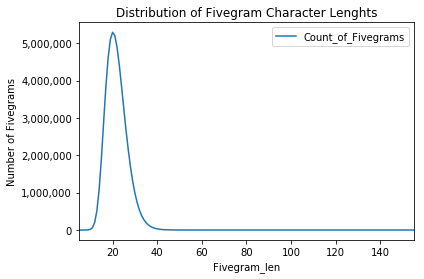

In [60]:
#Plot a histogram
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker

#create dict and DF that will hold the counts of the number of fivegrams of each length
fivegram_lengths_list = []
fivegram_counts_list = []


#Add the fivegram lengths and the number of fivegrams of that length to a dict
with open('distribution.txt', 'r') as f:
    for line in f:
        line_list = line.strip("\n").strip("(").strip(")").split("\t")
        fivegram_lengths_list.append(int(line_list[0]))
        fivegram_counts_list.append(int(line_list[1]))

#Create a dataframe
fivegram_hist_df = pd.DataFrame({'Fivegram_len':fivegram_lengths_list, 'Count_of_Fivegrams':fivegram_counts_list})

#Sort the dataframe by fivegram length
fivegram_hist_df = fivegram_hist_df.sort_values('Fivegram_len')

#Plot density plot
plt.figure()
fivegram_hist_df.plot(x = 'Fivegram_len', y = 'Count_of_Fivegrams')
plt.title("Distribution of Fivegram Character Lenghts")
plt.ylabel("Number of Fivegrams")
ax = plt.axes()
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## Distribution MRJob stats

    altiscale cluster with 176 nodes and 476 GB of memory

    RUNNING for 5 min 13 sec 
    Launched map tasks=190  
    Launched reduce tasks=20   


In [ ]:
%matplotlib inline
import numpy as np
import pylab as pl

results_A = []
for line in open("5.3distributions/part-00000").readlines():
    line = line.strip()
    X,Y = line.split(",")
    results_A.append([int(X),int(Y)])

items = (np.array(results_A)[::-1].T)
fig = pl.figure(figsize=(17,7))
ax = pl.subplot(111)
width=0.8
ax.bar(range(len(items[0])), items[1], width=width)
ax.set_xticks(np.arange(len(items[0])) + width/2)
ax.set_xticklabels(items[0], rotation=90)



pl.title("Distributions of 5 Gram lengths")
pl.show()

## 3.  HW5.4.2 <a name="5.4.2"></a>OPTIONAL Question: log-log plots (PHASE 2)
[Back to Table of Contents](#TOC)

Plot the log-log plot of the frequency distributuion of unigrams. Does it follow power law distribution?

For more background see:
- https://en.wikipedia.org/wiki/Log%E2%80%93log_plot
- https://en.wikipedia.org/wiki/Power_law

## 3.  HW5.5  <a name="5.5"></a> Synonym detection over 2Gig of Data with extra Preprocessing steps (HW5.3 plus some preprocessing)   (Phase 2)
[Back to Table of Contents](#TOC)

For the remainder of this assignment please feel free to eliminate stop words from your analysis

>There is also a corpus of stopwords, that is, high-frequency words like "the", "to" and "also" that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts. Python's nltk comes with a prebuilt list of stopwords (see below). Using this stopword list filter out these tokens from your analysis and rerun the experiments in 5.5 and disucuss the results of using a stopword list and without using a stopword list.

> from nltk.corpus import stopwords
 stopwords.words('english')
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

### 2: A large subset of the Google n-grams dataset as was described above

For each HW 5.4 -5.5.1 Please unit test and system test your code with respect 
to SYSTEMS TEST DATASET and show the results. 
Please compute the expected answer by hand and show your hand calculations for the 
SYSTEMS TEST DATASET. Then show the results you get with your system.

In this part of the assignment we will focus on developing methods for detecting synonyms, using the Google 5-grams dataset. At a high level:


1. remove stopwords
2. get 10,0000 most frequent
3. get 1000 (9001-10000) features
3. build stripes

To accomplish this you must script two main tasks using MRJob:


__TASK (1)__ Build stripes for the most frequent 10,000 words using cooccurence information based on
the words ranked from 9001,-10,000 as a basis/vocabulary (drop stopword-like terms),
and output to a file in your bucket on s3 (bigram analysis, though the words are non-contiguous).


__TASK (2)__ Using two (symmetric) comparison methods of your choice 
(e.g., correlations, distances, similarities), pairwise compare 
all stripes (vectors), and output to a file in your bucket on s3.

#### Design notes for TASK (1)
For this task you will be able to modify the pattern we used in HW 3.2
(feel free to use the solution as reference). To total the word counts 
across the 5-grams, output the support from the mappers using the total 
order inversion pattern:

<*word,count>

to ensure that the support arrives before the cooccurrences.

In addition to ensuring the determination of the total word counts,
the mapper must also output co-occurrence counts for the pairs of
words inside of each 5-gram. Treat these words as a basket,
as we have in HW 3, but count all stripes or pairs in both orders,
i.e., count both orderings: (word1,word2), and (word2,word1), to preserve
symmetry in our output for TASK (2).

#### Design notes for _TASK (2)_
For this task you will have to determine a method of comparison.
Here are a few that you might consider:

- Jaccard
- Cosine similarity
- Spearman correlation
- Euclidean distance
- Taxicab (Manhattan) distance
- Shortest path graph distance (a graph, because our data is symmetric!)
- Pearson correlation
- Kendall correlation

However, be cautioned that some comparison methods are more difficult to
parallelize than others, and do not perform more associations than is necessary, 
since your choice of association will be symmetric.

Please use the inverted index (discussed in live session #5) based pattern to compute the pairwise (term-by-term) similarity matrix. 

Please report the size of the cluster used and the amount of time it takes to run for the index construction task and for the synonym calculation task. How many pairs need to be processed (HINT: use the posting list length to calculate directly)? Report your  Cluster configuration!

## Example MR stats: (report times!)
    took ~11 minutes on 5 m3.xlarge nodes
    Data-local map tasks=188
	Launched map tasks=190
	Launched reduce tasks=15
	Other local map tasks=2

In [ ]:
# START STUDENT CODE 5.5
# ADD OR REMOVE CELLS AS NEEDED

### Step 1: Get the top 10,000 Words  


In [24]:
# make sure you have the stopwords corpus
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nwchen24/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [111]:
%%writefile mostFrequentWords_rank.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

import re

import mrjob
from mrjob.protocol import RawProtocol
from mrjob.protocol import RawValueProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep
import nltk
from nltk.corpus import stopwords as sw
from operator import itemgetter
import numpy as np


class mostFrequentWords(MRJob):
    
    #****************************************************
    # Allows values to be treated as keys
    MRJob.SORT_VALUES = True 
    
    # The protocols are critical. It will not work without these:
    INPUT_PROTOCOL = RawValueProtocol
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
     
    def __init__(self, *args, **kwargs):
        super(mostFrequentWords, self).__init__(*args, **kwargs)
        self.NUM_REDUCERS = 21
    #****************************************************
    #************************************************    
    #Get word counts

    def mapper_init(self):
        self.stopwords = []

        with open("english") as f:
            for line in f:
                self.stopwords.append(line.strip("\n"))
        
    def mapper_wc(self, _, line):
        
        #get the list of tokens in the 5-gram
        token_list = line.strip().lower().split()[:-3]

        #emit each token and a 1   
        for token in token_list:
            #if token not in sw.words('english'):
            if token not in self.stopwords:
                yield token, str(1)

    def combiner_wc(self, token, count):
        #just do local sums before passing to reducer
        count_sum = 0
        for item in count:
            count_sum += int(item)
        yield token, str(count_sum)            
            
    def reducer_wc(self, token, count):
        count_sum = 0
        for item in count:
            count_sum += int(item)
        yield token, str(count_sum)

    #********************************************************
    #Rank by word count and only emit top 10k
    
    def mapper_rank(self, word, count):
        yield word, count

    def reducer_rank_init(self):
        self.rank_counter = 0
        
    def reducer_rank(self, word, count):
        self.rank_counter += 1
        
        if self.rank_counter <= 10000:
            for count_out in count:
                yield word, str(count_out)
        else:
            pass
       
    #********************************************************
    #Steps
    def steps(self):

        JOBCONF_STEP1 = {
            'stream.num.map.output.key.fields':3,
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':"\t",
            'mapreduce.partition.keycomparator.options':'-k2,2nr',
            'mapred.reduce.tasks': 1,
            'partitioner':'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
        }
        
        JOBCONF_STEP3 = {
            'mapred.map.tasks': 1,
            'mapred.reduce.tasks': 1
        }
        
        return [
            MRStep(mapper_init=self.mapper_init,
                   mapper=self.mapper_wc,
                   combiner=self.combiner_wc,
                   reducer=self.reducer_wc),
            MRStep(jobconf=JOBCONF_STEP1,
                   mapper=self.mapper_rank,
                   reducer_init=self.reducer_rank_init,
                   reducer=self.reducer_rank)
        ]
    
if __name__ == '__main__':
    mostFrequentWords.run()

Overwriting mostFrequentWords_rank.py


In [115]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2
 
#Hadoop mode for altiscale cluster - ran 4min57sec
!python mostFrequentWords_rank.py -r hadoop hdfs:///user/cendylin/filtered-5Grams > google_5grams_top10k_words \
    --file=/home/nwchen24/nltk_data/corpora/stopwords/english \
    --python-bin=./myenv_for_hadoop2/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/myenv_for_hadoop2.zip#myenv_for_hadoop2



17/06/22 03:12:30 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 5760 minutes, Emptier interval = 360 minutes.
Moved: 'hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/HW5_Phase2' to trash at: hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/.Trash/Current
No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/mostFrequentWords_rank.nwchen24.20170622.031231.492177
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/mostFrequentWords_rank.nwchen24.20170622.031231.492177/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Detected hadoop configuration property names that do not match hadoop version 2.7.3:
The have been translated as follows
 mapred.output.key.comparator.class: mapreduce.job.output.key.comparator

Removing HDFS temp directory hdfs:///user/nwchen24/tmp/mrjob/mostFrequentWords_rank.nwchen24.20170622.031231.492177...
Removing temp directory /tmp/mostFrequentWords_rank.nwchen24.20170622.031231.492177...


### Step 2: Build Stripes  

Build stripes for all words in n-grams, but the only entries in the stripes are the 9k - 10k words

In [129]:
%%writefile buildStripes.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import re
import mrjob
import json
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep
import itertools
import collections as cl
import ast

class MRbuildStripes(MRJob):
  
    #START SUDENT CODE531_STRIPES
    
    #OUTPUT_PROTOCOL = JSONValueProtocol
    
    def steps(self):
        
        JOBCONF_STEP = {
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':'\t',    
            'mapreduce.partition.keycomparator.options': '-k1,1',
            'mapreduce.job.reduces': '30'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP,
                   mapper_init=self.mapper_init,
                   mapper=self.mapper,
                   reducer=self.reducer
                  )
        ]
    
    def mapper_init(self):
        self.increment_counter('group', 'Num_mapperInit_calls', 1)
             
        counter = 0
        
        self.words_10k = open("google_5grams_top10k_words").readlines()
        self.words_10k_list = []
        self.words_9k_10k_list = []
        
        for line in self.words_10k:
            #Add each word to the list
            self.words_10k_list.append(line.split()[0].strip("\""))
 
            if counter > 9000:
                self.words_9k_10k_list.append(line.split()[0].strip("\""))
            
            counter += 1
        
        #convert the 10k words to set
        self.words_10k_set = set(self.words_10k_list)
        
        #yield self.words_9k_10k_list,None
    def mapper(self, _, line):
        
        #instantiate dict to hold stripes
        stripes_dict = {}
        
        #parse the co-occurrence count from the line
        co_occur_count = line.strip().split()[-3]

        #Get list of words to build stripes for
        build_stripe_list = set(line.strip().lower().split()[:-3]) & self.words_10k_set
        
        if len(build_stripe_list) < 2:
            pass
        
        else:        
            for subset in itertools.permutations(sorted(build_stripe_list), 2):
                if subset[1].strip("\"") not in self.words_9k_10k_list:
                    pass #could also use "continue"... not much difference in this particular scenario though

                else:
                    if subset[0].strip("\"") not in stripes_dict.keys():
                        stripes_dict[subset[0].strip("\"")] = {}
                        stripes_dict[subset[0].strip("\"")][subset[1].strip("\"")] = int(co_occur_count)

                    elif subset[1].strip("\"") not in stripes_dict[subset[0].strip("\"")]:
                        stripes_dict[subset[0].strip("\"")][subset[1].strip("\"")] = int(co_occur_count)

                    else:
                        stripes_dict[subset[0].strip("\"")][subset[1].strip("\"")] += int(co_occur_count)

            for key in stripes_dict:
                yield key, stripes_dict[key]

    def reducer(self,key,stripe):
        
        #instantiate counter to hold combined stripes
        cur_counter = cl.Counter()
                
        for stripe_dict in stripe:
            cur_key = key
            
            #load the stripe into a dict
            stripe_dict_to_add = stripe_dict
            
            #update with each stripe
            cur_counter.update(stripe_dict_to_add)

        #output the key and the counter with the sum of all co-occurrences for that key
        yield key, cur_counter

    #END SUDENT CODE531_STRIPES

if __name__ == '__main__':
    MRbuildStripes.run()

Overwriting buildStripes.py


In [143]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2/stripes

#Hadoop to try in altiscale. Ran 2min53sec.
!python buildStripes.py -r hadoop --file=google_5grams_top10k_words hdfs:///user/cendylin/filtered-5Grams \
    --output-dir='/user/nwchen24/HW5_Phase2/stripes'\
    --no-output\
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload    


17/06/22 04:23:25 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 5760 minutes, Emptier interval = 360 minutes.
Moved: 'hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/HW5_Phase2/stripes' to trash at: hdfs://nn-ia.s3s.altiscale.com:8020/user/nwchen24/.Trash/Current
No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/buildStripes.nwchen24.20170622.042326.831048
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/buildStripes.nwchen24.20170622.042326.831048/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob8378315993788984844.jar tmpDir=null
  Timeline service address: http://rm-ia.s

### Step 3: Create Inverted Indices

In [135]:
%%writefile invertedIndex.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import collections as cl
import re
import json
import math
import numpy as np
import itertools
import mrjob
from mrjob.protocol import RawProtocol
from mrjob.job import MRJob
from mrjob.step import MRStep
import sys

class MRinvertedIndex(MRJob):
    #START SUDENT CODE531_INV_INDEX
    
    #OUTPUT_PROTOCOL = JSONValueProtocol

    
    def steps(self):
        
        JOBCONF_STEP = {
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':'\t',    
            'mapreduce.partition.keycomparator.options': '-k1,1',
            'mapreduce.job.reduces': '30'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP,
                   mapper=self.mapper,
                   reducer=self.reducer
                  )
        ]
    
    def mapper(self, _, line):
        
        #Read the key and the stripe from the input
        key_stripe_list = line.strip("\n").split("\t")
        
        key = json.loads(key_stripe_list[0])
        stripe = json.loads(key_stripe_list[1])
        
        #get length of the stripe
        stripe_len = len(stripe)
        
        #create dict that will hold doc title and the stripe length
        stripe_len_dict = {key:stripe_len}
        
        for term in stripe:
            yield term, stripe_len_dict
  
    def reducer(self, key, stripe):

        #instantiate a dict where we will combine stripe_len_dicts emitted from mapper
        stripe_len_dict_combined = {}
        
        #Read the incremental stripe length dit from the mapper output
        for stripe_len_dict in stripe:
            
            #update the dict above with each incremental stripe length dict
            stripe_len_dict_combined.update(stripe_len_dict)
                    
        yield key, stripe_len_dict_combined        
        
        #END SUDENT CODE531_INV_INDEX
        
if __name__ == '__main__':
    MRinvertedIndex.run() 

Overwriting invertedIndex.py


In [169]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2/inv_index

#Hadoop to try in altiscale. Ran 1min49sec
!python invertedIndex.py -r hadoop hdfs:///user/nwchen24/HW5_Phase2/stripes \
    --output-dir='/user/nwchen24/HW5_Phase2/inv_index'\
    --no-output\
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload


rm: `/user/nwchen24/HW5_Phase2/inv_index': No such file or directory
No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/invertedIndex.nwchen24.20170622.191725.861309
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/invertedIndex.nwchen24.20170622.191725.861309/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Running step 1 of 1...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob4844616952546228502.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/timeline/
  Connecting to ResourceManager at rm-ia.s3s.altiscale.com/10.251.255.108:8032
  Connecting to Application History server at rm-ia.s3s.altiscale.com/10.251.255.108:10200
  Timeline service 

### Step 4: Calculate Similarities  


In [173]:
%%writefile similarity.py
#!~/anaconda2/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import re
import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawValueProtocol
from mrjob.protocol import RawProtocol
from operator import itemgetter
import numpy as np
import itertools
import json
import math
import collections
import ast


class MRsimilarity(MRJob):
             
    #****************************************************
    # Allows values to be treated as keys
    MRJob.SORT_VALUES = True 
    
    #The protocols are critical. Total sort will not work without these:
    #Raw protocols require emitting strings from each phase
    INPUT_PROTOCOL = RawValueProtocol
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
     
    def __init__(self, *args, **kwargs):
        super(MRsimilarity, self).__init__(*args, **kwargs)
        self.NUM_REDUCERS = 50
    #****************************************************


    def mapper(self, _, line):
        
        #Read the key and the stripe from the input
        key_index_list = line.translate(None,"\n").split("\t")
        
        key = json.loads(key_index_list[0])
        inv_index = json.loads(key_index_list[1])
        
        for subset in itertools.permutations(sorted(set(inv_index.keys())), 2):
            
            #get the lengths of each item that we want to output
            item_1_len = inv_index[subset[0]]
            item_2_len = inv_index[subset[1]]
            
            #create a two item dict to hold the item names and their lengths
            item_len_dict = {}
            item_len_dict[subset[0]] = item_1_len
            item_len_dict[subset[1]] = item_2_len
            
            yield subset[0]+"|"+subset[1], str(1)+"\t"+str(item_len_dict)
  
    def reducer(self, key, stripe):

        #instantiate object to hold the number of times the terms / documents intersect
        items_intersect = 0
        cosine_sim_product = 0
        
        #Split the compound key to get each word individually
        key_list = key.split("|")
        
        #the reducer gets output from the mapper in chunks grouped by key
        for mapper_out in stripe:
            
            #Parse the mapper_out which is a string of count and the length dict separated by a tab
            mapper_out_list = mapper_out.split("\t")
            
            #interpret the dict output from the mapper as a string
            item_len_dict = ast.literal_eval(mapper_out_list[1])
            #get the counter output from the mapper
            n = int(mapper_out_list[0])
            
            #get the length of item 1 and item 2
            item_1_len = item_len_dict[key_list[0]]
            item_2_len = item_len_dict[key_list[1]]
            
            #increment the intersect count
            items_intersect = items_intersect + n
            
            cosine_sim_product = cosine_sim_product + (1/np.sqrt(item_1_len)) * (1/np.sqrt(item_2_len))
            
        #calculate jacard similarity score
        jacard_sim_score = float(items_intersect)/ float(item_1_len + item_2_len - items_intersect)
        
        #Record cosine similarity score before moving on to the next chunk
        cosine_sim_score = cosine_sim_product
        
        #average sim score
        avg_sim_score = (jacard_sim_score + cosine_sim_score) / 2
        
        yield key, str(avg_sim_score)+"\t"+str(jacard_sim_score)+"\t"+str(cosine_sim_score)   

    
    #*********************************************************************
    #Sort the partitions in descending order of average sim score
    #Implement total sort with ordered partitions
    def mapper_partitioner_init(self):
        
        #Function to hash keys
        def makeKeyHash(key, num_reducers):
            byteof = lambda char: int(format(ord(char), 'b'), 2)
            current_hash = 0
            for c in key:
                current_hash = (current_hash * 31 + byteof(c))
            return current_hash % num_reducers
        
        # get the keys: printable ascii characters, starting with 'A'
        keys = [str(unichr(i)) for i in range(65,65+self.NUM_REDUCERS)]
        partitions = []
        
        #Hash each key and link the key to its hashed int value
        for key in keys:
            partitions.append([key, makeKeyHash(key, self.NUM_REDUCERS)])

        #This step re-sorts so that the keys are 'out of order', but the partitions are 'ordered'
        parts = sorted(partitions,key=itemgetter(1))
        self.partition_keys = list(np.array(parts)[:,0])
        
        #generate breakpoints that will better match a power law distribution to get equally sized buckets.
        break_list = []

        first_break = 0.75

        for i in range(self.NUM_REDUCERS):
            break_list.append(first_break * 0.91** (i))
        
        #Create partition file from the break list.
        self.partition_file = np.array(break_list)
        
    
    #Read line and assign partition key to each line based on the value
    def mapper_partition(self, key, value):

        value_list = value.split("\t")
        avg_sim_score = value_list[0]
        # Prepend the approriate key by finding the bucket, and using the index to fetch the key.
        #Loop over number of reducers
        for idx in xrange(self.NUM_REDUCERS):
            if float(avg_sim_score) > self.partition_file[idx]:
                #Need to emit the partition key here to leverage the hadoop shuffle phase.
                yield str(self.partition_keys[idx]),key+"\t"+value
                break
            
    def reducer_sort(self,key,value):
        for v in value:
            #This emits the partition key for illustration
            #yield key,v
            #This omits the partition key from the output
            yield None, v
        
    def steps(self):


        JOBCONF_STEP = {
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':'\t',    
            'stream.num.map.output.key.fields': '2',
            'mapreduce.partition.keycomparator.options': '-k1,1',
            'mapreduce.job.reduces': self.NUM_REDUCERS
        }
        
        JOBCONF_STEP2 = {
            'stream.num.map.output.key.fields':4,
            'mapreduce.job.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'stream.map.output.field.separator':"\t",
            'mapreduce.partition.keypartitioner.options':'-k1,1',
            'mapreduce.partition.keycomparator.options':'-k3,3nr -k2,2',
            'mapred.reduce.tasks': self.NUM_REDUCERS,
            'partitioner':'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
        }
        
        return [
            MRStep(jobconf=JOBCONF_STEP,
                   mapper=self.mapper,
                   reducer=self.reducer),
            MRStep(jobconf=JOBCONF_STEP2,
                    mapper_init=self.mapper_partitioner_init,
                    mapper=self.mapper_partition,
                    reducer=self.reducer_sort
                  )
        ]
                  
        
        
    #END SUDENT CODE531_SIMILARITY

if __name__ == '__main__':
    MRsimilarity.run()

Overwriting similarity.py


In [176]:
!hdfs dfs -rm -r /user/nwchen24/HW5_Phase2/similarities

#Hadoop to try in altiscale. Ran in ~36 min with 50 reducers
!python similarity.py -r hadoop hdfs:///user/nwchen24/HW5_Phase2/inv_index \
    --output-dir='/user/nwchen24/HW5_Phase2/similarities' \
    --no-output \
    --python-bin=./my_env27_for_hadoop_upload/bin/python \
    --archive=hdfs:///user/nwchen24/virtualenv/my_env27_for_hadoop_upload.zip#my_env27_for_hadoop_upload
    

rm: `/user/nwchen24/HW5_Phase2/similarities': No such file or directory
No configs found; falling back on auto-configuration
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Creating temp directory /tmp/similarity.nwchen24.20170622.195714.041304
Using Hadoop version 2.7.3
Copying local files to hdfs:///user/nwchen24/tmp/mrjob/similarity.nwchen24.20170622.195714.041304/files/...
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar
Detected hadoop configuration property names that do not match hadoop version 2.7.3:
The have been translated as follows
 mapred.text.key.partitioner.options: mapreduce.partition.keypartitioner.options
Running step 1 of 2...
  packageJobJar: [] [/opt/hadoop-2.7.3/share/hadoop/tools/lib/hadoop-streaming-2.7.3.jar] /tmp/streamjob3414837540192038067.jar tmpDir=null
  Timeline service address: http://rm-ia.s3s.altiscale.com:8188/ws/v1/

   map 100% reduce 56%
   map 100% reduce 57%
   map 100% reduce 59%
   map 100% reduce 61%
   map 100% reduce 62%
   map 100% reduce 63%
   map 100% reduce 65%
   map 100% reduce 66%
   map 100% reduce 71%
   map 100% reduce 73%
   map 100% reduce 74%
   map 100% reduce 75%
   map 100% reduce 76%
   map 100% reduce 77%
   map 100% reduce 78%
   map 100% reduce 79%
   map 100% reduce 81%
   map 100% reduce 82%
   map 100% reduce 83%
   map 100% reduce 84%
   map 100% reduce 85%
   map 100% reduce 86%
   map 100% reduce 87%
   map 100% reduce 88%
   map 100% reduce 89%
   map 100% reduce 90%
   map 100% reduce 91%
   map 100% reduce 92%
   map 100% reduce 93%
   map 100% reduce 94%
   map 100% reduce 95%
   map 100% reduce 96%
   map 100% reduce 97%
   map 100% reduce 98%
   map 100% reduce 99%
   map 100% reduce 100%
  Job job_1497906899862_2159 completed successfully
  Output directory: hdfs:///user/nwchen24/HW5_Phase2/similarities
Counters: 50
	File Input Format Counters 
		Bytes Rea

In [31]:
#copy the top 1000 results to local
!hdfs dfs -copyToLocal /user/nwchen24/HW5_Phase2/similarities/part-00000 part00000
!hdfs dfs -copyToLocal /user/nwchen24/HW5_Phase2/similarities/part-00001 part00001
!hdfs dfs -copyToLocal /user/nwchen24/HW5_Phase2/similarities/part-00002 part00002
!hdfs dfs -copyToLocal /user/nwchen24/HW5_Phase2/similarities/part-00003 part00003

#concatenate the files
!cat part00000 part00001 part00002 part00003 > top_sim_results

#remove every other line to remove duplicates e.g. con|pro and pro|con
!sed '1~2d' top_sim_results > unique_top_sim_results

#Get the top 1000 results
!head -1000 unique_top_sim_results > top_1k_sim_results

copyToLocal: `part00000': File exists
copyToLocal: `part00001': File exists
copyToLocal: `part00002': File exists
copyToLocal: `part00003': File exists


In [30]:
#Print the top and bottom results of the top 1000
sortedSims = open('top_1k_sim_results').readlines()

print "\nTop/Bottom 20 results - Similarity measures - sorted by average"
print "(From the entire data set)"
print '—'*117
print "{0:>30} |{1:>15} |{2:>15} |{3:>15}".format(
        "pair", "average", "cosine", "jaccard")

print '='*117
print "Top 20"
print '-'*117

for stripe in sortedSims[:20]:
    stripe_print = stripe.split("\t")
    print "{0:>30} |{1:>15f} |{2:>15f} |{3:>15f}".format(
        stripe_print[0], float(stripe_print[1]), float(stripe_print[2]), float(stripe_print[3]))

print '='*117
print "Bottom 20 of Top 1000"
print '-'*117
    
for stripe in sortedSims[-20:]:
    stripe_print = stripe.split("\t")
    print "{0:>30} |{1:>15f} |{2:>15f} |{3:>15f}".format(
        stripe_print[0], float(stripe_print[1]), float(stripe_print[2]), float(stripe_print[3]))




Top/Bottom 20 results - Similarity measures - sorted by average
(From the entire data set)
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                          pair |        average |         cosine |        jaccard
Top 20
---------------------------------------------------------------------------------------------------------------------
                       one|may |       0.936823 |       0.916667 |       0.956979
                      time|one |       0.929034 |       0.906439 |       0.951630
                      well|one |       0.903754 |       0.873621 |       0.933887
                   los|angeles |       0.895371 |       0.863636 |       0.927105
                     would|one |       0.895159 |       0.862450 |       0.927869
                     one|first |       0.888629 |       0.853831 |       0.923427
                      time|may |       0.880687 |       0.845226 |       0.916149
         

In [ ]:
# END STUDENT CODE 5.5

In [ ]:
Top/Bottom 20 results - Similarity measures - sorted by cosine
(From the entire data set)
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                          pair |         cosine |        jaccard |        overlap |           dice |        average
---------------------------------------------------------------------------------------------------------------------
                   cons - pros |       0.894427 |       0.800000 |       1.000000 |       0.888889 |       0.895829
            forties - twenties |       0.816497 |       0.666667 |       1.000000 |       0.800000 |       0.820791
                    own - time |       0.809510 |       0.670563 |       0.921168 |       0.802799 |       0.801010
                 little - time |       0.784197 |       0.630621 |       0.926101 |       0.773473 |       0.778598
                  found - time |       0.783434 |       0.636364 |       0.883788 |       0.777778 |       0.770341
                 nova - scotia |       0.774597 |       0.600000 |       1.000000 |       0.750000 |       0.781149
                   hong - kong |       0.769800 |       0.615385 |       0.888889 |       0.761905 |       0.758995
                   life - time |       0.769666 |       0.608789 |       0.925081 |       0.756829 |       0.765091
                  time - world |       0.755476 |       0.585049 |       0.937500 |       0.738209 |       0.754058
                  means - time |       0.752181 |       0.587117 |       0.902597 |       0.739854 |       0.745437
                   form - time |       0.749943 |       0.588418 |       0.876733 |       0.740885 |       0.738995
       infarction - myocardial |       0.748331 |       0.560000 |       1.000000 |       0.717949 |       0.756570
                 people - time |       0.745788 |       0.573577 |       0.923875 |       0.729010 |       0.743063
                 angeles - los |       0.745499 |       0.586207 |       0.850000 |       0.739130 |       0.730209
                  little - own |       0.739343 |       0.585834 |       0.767296 |       0.738834 |       0.707827
                    life - own |       0.737053 |       0.582217 |       0.778502 |       0.735951 |       0.708430
          anterior - posterior |       0.733388 |       0.576471 |       0.790323 |       0.731343 |       0.707881
                  power - time |       0.719611 |       0.533623 |       0.933586 |       0.695898 |       0.720680
              dearly - install |       0.707107 |       0.500000 |       1.000000 |       0.666667 |       0.718443
                   found - own |       0.704802 |       0.544134 |       0.710949 |       0.704776 |       0.666165
—————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
           arrival - essential |       0.008258 |       0.004098 |       0.009615 |       0.008163 |       0.007534
         governments - surface |       0.008251 |       0.003534 |       0.014706 |       0.007042 |       0.008383
                king - lesions |       0.008178 |       0.003106 |       0.017857 |       0.006192 |       0.008833
              clinical - stood |       0.008178 |       0.003831 |       0.011905 |       0.007634 |       0.007887
               till - validity |       0.008172 |       0.003367 |       0.015625 |       0.006711 |       0.008469
            evidence - started |       0.008159 |       0.003802 |       0.012048 |       0.007576 |       0.007896
               forces - record |       0.008152 |       0.003876 |       0.011364 |       0.007722 |       0.007778
               primary - stone |       0.008146 |       0.004065 |       0.009091 |       0.008097 |       0.007350
             beneath - federal |       0.008134 |       0.004082 |       0.008403 |       0.008130 |       0.007187
                factors - rose |       0.008113 |       0.004032 |       0.009346 |       0.008032 |       0.007381
           evening - functions |       0.008069 |       0.004049 |       0.008333 |       0.008065 |       0.007129
                   bone - told |       0.008061 |       0.003704 |       0.012346 |       0.007380 |       0.007873
             building - occurs |       0.008002 |       0.003891 |       0.010309 |       0.007752 |       0.007489
                 company - fig |       0.007913 |       0.003257 |       0.015152 |       0.006494 |       0.008204
               chronic - north |       0.007803 |       0.003268 |       0.014493 |       0.006515 |       0.008020
             evaluation - king |       0.007650 |       0.003030 |       0.015625 |       0.006042 |       0.008087
             resulting - stood |       0.007650 |       0.003663 |       0.010417 |       0.007299 |       0.007257
                 agent - round |       0.007515 |       0.003289 |       0.012821 |       0.006557 |       0.007546
         afterwards - analysis |       0.007387 |       0.003521 |       0.010204 |       0.007018 |       0.007032
            posterior - spirit |       0.007156 |       0.002660 |       0.016129 |       0.005305 |       0.007812

## 3.  HW5.6  <a name="5.6"></a> Evaluation of synonyms that your discovered
[Back to Table of Contents](#TOC)


In this part of the assignment you will evaluate the success of you synonym detector (developed in response to HW5.4).
Take the top 1,000 closest/most similar/correlative pairs of words as determined by your measure in HW5.4, and use the synonyms function in the accompanying python code:

nltk_synonyms.py

Note: This will require installing the python nltk package:

http://www.nltk.org/install.html

and downloading its data with nltk.download().

For each (word1,word2) pair, check to see if word1 is in the list, 
synonyms(word2), and vice-versa. If one of the two is a synonym of the other, 
then consider this pair a 'hit', and then report the precision, recall, and F1 measure  of 
your detector across your 1,000 best guesses. Report the macro averages of these measures.

### Calculate performance measures:
$$Precision (P) = \frac{TP}{TP + FP} $$  
$$Recall (R) = \frac{TP}{TP + FN} $$  
$$F1 = \frac{2 * ( precision * recall )}{precision + recall}$$


We calculate Precision by counting the number of hits and dividing by the number of occurances in our top1000 (opportunities)   
We calculate Recall by counting the number of hits, and dividing by the number of synonyms in wordnet (syns)


Other diagnostic measures not implemented here:  https://en.wikipedia.org/wiki/F1_score#Diagnostic_Testing

In [44]:
#Download nltk wordnet
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/nwchen24/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [53]:
''' Performance measures '''
from __future__ import division
import numpy as np
import json
import nltk
from nltk.corpus import wordnet as wn
import sys
#print all the synset element of an element
def synonyms(string):
    syndict = {}
    for i,j in enumerate(wn.synsets(string)):
        syns = j.lemma_names()
        for syn in syns:
            syndict.setdefault(syn,1)
    return syndict.keys()
hits = []

TP = 0
FP = 0

TOTAL = 0
flag = False # so we don't double count, but at the same time don't miss hits

top1000sims = []
with open("top_1k_sim_results","r") as f:
    for line in f.readlines():

        line = line.strip()
        words = line.split("\t")[0]
        top1000sims.append(words)
    

measures = {}
not_in_wordnet = []

for line in top1000sims:
    TOTAL += 1

    words = line.split("|")
    
    for word in words:
        if word not in measures:
            measures[word] = {"syns":0,"opps": 0,"hits":0}
        measures[word]["opps"] += 1 
    
    syns0 = synonyms(words[0])
    measures[words[1]]["syns"] = len(syns0)
    if len(syns0) == 0:
        not_in_wordnet.append(words[0])
        
    if words[1] in syns0:
        TP += 1
        hits.append(line)
        flag = True
        measures[words[1]]["hits"] += 1
        
        
        
    syns1 = synonyms(words[1]) 
    measures[words[0]]["syns"] = len(syns1)
    if len(syns1) == 0:
        not_in_wordnet.append(words[1])

    if words[0] in syns1:
        if flag == False:
            TP += 1
            hits.append(line)
            measures[words[0]]["hits"] += 1
            
    flag = False    

precision = []
recall = []
f1 = []

for key in measures:
    p,r,f = 0,0,0
    if measures[key]["hits"] > 0 and measures[key]["syns"] > 0:
        p = measures[key]["hits"]/measures[key]["opps"]
        r = measures[key]["hits"]/measures[key]["syns"]
        f = 2 * (p*r)/(p+r)
    
    # For calculating measures, only take into account words that have synonyms in wordnet
    if measures[key]["syns"] > 0:
        precision.append(p)
        recall.append(r)
        f1.append(f)

#Get unique list of words not in wordnet
not_in_wordnet_set = set(not_in_wordnet)   

# Take the mean of each measure    
print "—"*110    
print "Number of Hits:",TP, "out of top",TOTAL
print "Number of words without synonyms:",len(not_in_wordnet_set)
print "—"*110 
print "Precision\t", np.mean(precision)
print "Recall\t\t", np.mean(recall)
print "F1\t\t", np.mean(f1)
print "—"*110  

print "Words without synonyms:"
print "-"*100


for word in not_in_wordnet_set:
    print word
    

——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Number of Hits: 12 out of top 1000
Number of words without synonyms: 11
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Precision	0.0061494750275
Recall		0.0446299451837
F1		0.00781238955623
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Words without synonyms:
----------------------------------------------------------------------------------------------------
among
hong
would
shall
could
upon
per
kong
angeles
los
without


### Sample output

In [ ]:
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Number of Hits: 31 out of top 1000
Number of words without synonyms: 67
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Precision	0.0280214404967
Recall		0.0178598869579
F1		0.013965517619
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Words without synonyms:
----------------------------------------------------------------------------------------------------
[] scotia
[] hong
[] kong
[] angeles
[] los
[] nor
[] themselves
[] 
.......

## 3.  HW5.7  <a name="5.7"></a> OPTIONAL: using different vocabulary subsets
[Back to Table of Contents](#TOC)


Repeat HW5 using vocabulary words ranked from 8001,-10,000;  7001,-10,000; 6001,-10,000; 5001,-10,000; 3001,-10,000; and 1001,-10,000;
Dont forget to report you Cluster configuration.

Generate the following graphs:
-- vocabulary size (X-Axis) versus CPU time for indexing
-- vocabulary size (X-Axis) versus number of pairs processed
-- vocabulary size (X-Axis) versus F1 measure, Precision, Recall

## 3.  HW5.8  <a name="5.8"></a> OPTIONAL: filter stopwords
[Back to Table of Contents](#TOC)

There is also a corpus of stopwords, that is, high-frequency words like "the", "to" and "also" that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts. Python's nltk comes with a prebuilt list of stopwords (see below). Using this stopword list filter out these tokens from your analysis and rerun the experiments in 5.5 and disucuss the results of using a stopword list and without using a stopword list.

> from nltk.corpus import stopwords
>> stopwords.words('english')
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']



## 3.  HW5.9 <a name="5.9"></a> OPTIONAL 
[Back to Table of Contents](#TOC)

There are many good ways to build our synonym detectors, so for this optional homework, 
measure co-occurrence by (left/right/all) consecutive words only, 
or make stripes according to word co-occurrences with the accompanying 
2-, 3-, or 4-grams (note here that your output will no longer 
be interpretable as a network) inside of the 5-grams.

## 3.  HW5.10 <a name="5.10"></a> OPTIONAL 
[Back to Table of Contents](#TOC)

Once again, benchmark your top 10,000 associations (as in 5.5), this time for your
results from 5.6. Has your detector improved?